In [1]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
gmaps.configure(api_key=gkey)

In [2]:
# Generating random Brewery IDs

brewery_id = []

for x in range(100):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Generated {len(unique_id)} unique Brewery IDs.")

Generated 100 unique Brewery IDs.


In [3]:
# Retrieving Raw Brewery Data
raw_brewery_data = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        raw_brewery_data.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/100) Retrieved Brewery ID 3323...
(2/100) Retrieved Brewery ID 182...
(3/100) Retrieved Brewery ID 5699...
(4/100) Retrieved Brewery ID 3752...
(5/100) Retrieved Brewery ID 2010...
(6/100) Retrieved Brewery ID 5247...
(7/100) Retrieved Brewery ID 1548...
(8/100) Retrieved Brewery ID 1365...
(9/100) Retrieved Brewery ID 4634...
(10/100) Retrieved Brewery ID 4589...
(11/100) Retrieved Brewery ID 1288...
(12/100) Retrieved Brewery ID 5088...
(13/100) Retrieved Brewery ID 4180...
(14/100) Retrieved Brewery ID 1819...
(15/100) Retrieved Brewery ID 5029...
(16/100) Retrieved Brewery ID 3177...
(17/100) Retrieved Brewery ID 4387...
(18/100) Retrieved Brewery ID 3185...
(19/100) Retrieved Brewery ID 5204...
(20/100) Retrieved Brewery ID 3274...
(21/100) Retrieved Brewery ID 1271...
(22/100) Retrieved Brewery ID 5981...
(23/100) Retrieved Brewery ID 4748...
(24/100) Retrieved Brewery ID 315...
(25/100) Retrieved Brewery ID 1633...
(26/100) Retrieved Brewery ID 5902...
(27/100) Retrieved Brew

In [4]:
# Creating DataFrame
brewery_df = pd.DataFrame(raw_brewery_data)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,planning,Boston,United States,3323,None,None,Night Shift Brewing,,02114,Massachusetts,,2018-08-11T21:37:42.634Z,
1,micro,Peoria,United States,182,33.6687744976834,-112.238054093359,Richter Aleworks,6029086553,85382-7434,Arizona,8279 W Lake Pleasant Pkwy Ste 110,2018-08-23T23:22:29.385Z,http://www.richteraleworks.com
2,brewpub,Portland,United States,5699,45.4762536,-122.648753114062,13 Virtues Brewing Co,5032393831,97202-5518,Oregon,6410 SE Milwaukie Ave,2018-08-24T15:45:45.178Z,http://www.13virtuesbrewing.com
3,micro,Decatur,United States,3752,42.1087669387755,-85.9745474897959,VanMax Brewing Company LLC,2692171720,49045-1008,Michigan,103 N Phelps St,2018-08-24T00:44:36.919Z,http://www.vanmaxbrewing.com
4,micro,Saint Petersburg,United States,2010,27.7719674285714,-82.644494,Overflow Brewing Company,,33701,Florida,770 1st Ave N,2018-08-24T00:28:05.892Z,http://www.overflowbrewingco.com


In [5]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 38 breweries from DataFrame which did not have coordinates.
Total Brewery count: 62


In [6]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
1,33.668774,-112.238054
2,45.476254,-122.648753
3,42.108767,-85.974547
4,27.771967,-82.644494
5,34.789988,-76.859457


In [7]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [9]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/62) Peoria weather data found...
(2/62) Portland weather data found...
(3/62) Decatur weather data found...
(4/62) Saint Petersburg weather data found...
(5/62) Newport weather data found...
(6/62) Pueblo weather data found...
(7/62) Greenwich weather data found...
(8/62) Cambridge weather data found...
(9/62) Vineland weather data found...
(10/62) Oriental weather data found...
(11/62) Greeley weather data found...
(12/62) Cave Junction weather data found...
(13/62) Lake Placid weather data found...
(14/62) Cannon Beach weather data found...
(15/62) Fairfield weather data found...
(16/62) Prior Lake weather data found...
(17/62) Atco weather data found...
(18/62) Somerset weather data found...
(19/62) Montclair weather data found...
(20/62) Napa weather data found...
(21/62) Butte weather data found...
(22/62) Lafayette weather data found...
(23/62) Patchogue weather data found...
(24/62) Santa Cruz weather data found...
(25/62) Columbus weather data found...
(26/62) Hyde Park weat

In [10]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Peoria,82.58
1,Portland,64.04
2,Decatur,78.08
3,Saint Petersburg,51.80
4,Newport,55.40
5,Pueblo,42.80
6,Greenwich,55.40
7,Cambridge,55.40
8,Vineland,77.00
9,Oriental,63.99


In [11]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/62) Found rating for Richter Aleworks...
(2/62) Found rating for 13 Virtues Brewing Co...
(3/62) Could not find rating for VanMax Brewing Company LLC...
(4/62) Found rating for Overflow Brewing Company...
(5/62) Found rating for Shortway Brewing Company...
(6/62) Found rating for Shamrock Brewing Company...
(7/62) Found rating for Argyle Brewing Company...
(8/62) Found rating for RAR Brewing...
(9/62) Found rating for Brinx Jones Brewery...
(10/62) Found rating for New Village Brewery and Taproom...
(11/62) Found rating for Brix Taphouse and Brewery...
(12/62) Could not find rating for Wild River Brewing and Pizza Co...
(13/62) Found rating for Great Adirondack Brewing Company...
(14/62) Found rating for Pelican Brewing Company - Cannon Beach...
(15/62) Could not find rating for Chau Tien Beer Company...
(16/62) Found rating for Boathouse Brothers Brewing Co...
(17/62) Found rating for Atco Brewing LLC...
(18/62) Found rating for Jarfly Brewing Co...
(19/62) Found rating for Egan & 

In [12]:
ratings_df = pd.DataFrame(ratings)
ratings_df

,name,rating
0,Richter Aleworks,4.6
1,13 Virtues Brewing Co,4.4
2,Overflow Brewing Company,4.6
3,Shortway Brewing Company,4.8
4,Shamrock Brewing Company,4.5
5,Argyle Brewing Company,4.7
6,RAR Brewing,4.6
7,Brinx Jones Brewery,4.9
8,New Village Brewery and Taproom,5.0
9,Brix Taphouse and Brewery,4.5


In [24]:
state_weather = pd.read_csv('weatherData.csv')
state_weather.head()

,state,Average Yearly Temp
0,Alabama,62.8
1,Alaska,26.6
2,Arizona,60.3
3,Arkansas,60.4
4,California,59.4


In [28]:
#Merging Data Frames
brewery_and_temp = brewery_df.merge(temp_df, how = 'outer', on = 'city') 
# brewery_and_temp
brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp', 'state']]
brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
brewery_temp_rat2 = brewery_temp_rating.merge(state_weather, how = 'outer', on = 'state')
dataset_clean = brewery_temp_rat2.dropna(how = 'any')
# dataset_clean
dataset_clean1 = dataset_clean.drop_duplicates('name')
dataset_clean2 = dataset_clean1.set_index('name')
dataset_clean2.head()

,brewery_type,city,temp,state,rating,Average Yearly Temp
name,,,,,,
Richter Aleworks,micro,Peoria,82.58,Arizona,4.6,60.3
Flying Basset Brewing,brewpub,Gilbert,40.10,Arizona,4.3,60.3
"Mother Bunch Brewing, Inc.",micro,Phoenix,80.06,Arizona,4.5,60.3
13 Virtues Brewing Co,brewpub,Portland,64.04,Oregon,4.4,48.4
Alameda Brewing Co,micro,Portland,64.04,Oregon,3.8,48.4


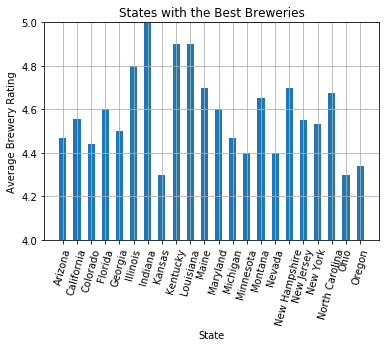

In [14]:
# Group DataFrame by State
group_by_state = dataset_clean2.groupby('state')

# Plot Average Rating By State
plt.bar(np.arange(0,len(group_by_state),1),height = group_by_state['rating'].mean(), tick_label = group_by_state['rating'].mean().index, width = 0.5)
plt.grid()
plt.title("States with the Best Breweries")
plt.xlabel("State")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 75)
plt.ylim(4,5)
plt.savefig("Average Brewery Rating vs State")


Text(0,0.5,'Rating')

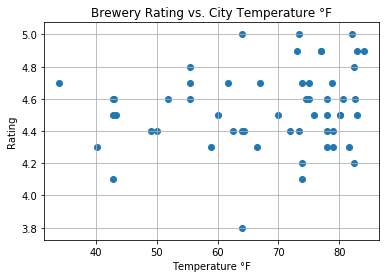

In [39]:
#Making Temp vs. Rating Scatter plot
plt.scatter(dataset_clean2['temp'], dataset_clean2['rating'])
plt.grid()
plt.title('Brewery Rating vs. City Temperature °F')
plt.xlabel('Temperature °F')
plt.ylabel('Rating')

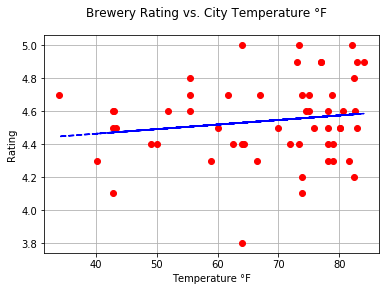

The slope of the line of best fit is 0.002774308084926835
The correlation coefficient is 0.1540346132521503


In [42]:
#Importing Stats
from scipy.stats import linregress

#Making Line of Best Fit for City Temp
(slope, intercept, _, _, _) = linregress(dataset_clean2['temp'], dataset_clean2['rating'])
fit = slope * dataset_clean2['temp'] + intercept

#Making plot
fig, ax = plt.subplots()
fig.suptitle("Brewery Rating vs. City Temperature °F", fontsize=12)

ax.set_xlabel("Temperature °F")
ax.set_ylabel("Rating")
corr_coef = np.corrcoef(dataset_clean2['temp'], dataset_clean2['rating'])[0, 1]
ax.plot(dataset_clean2['temp'], dataset_clean2['rating'], color = 'red', linewidth=0, marker='o')
ax.plot(dataset_clean2['temp'], fit, 'b--')
plt.grid()
plt.show()

print('The slope of the line of best fit is ' + str(slope))
print(f'The correlation coefficient is {corr_coef}')

Text(0,0.5,'Rating')

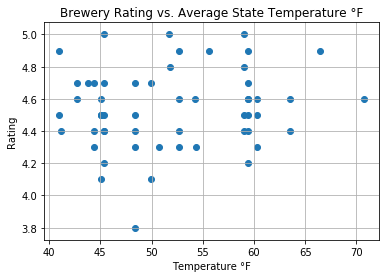

In [30]:
#Making State Temp vs. Rating Scatter plot
plt.scatter(dataset_clean2['Average Yearly Temp'], dataset_clean2['rating'])
plt.grid()
plt.title('Brewery Rating vs. Average State Temperature °F')
plt.xlabel('Temperature °F')
plt.ylabel('Rating')

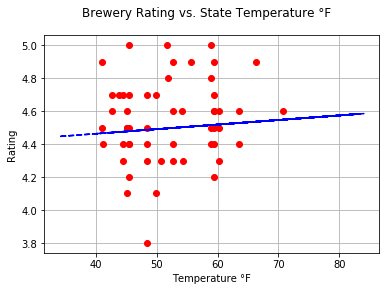

The slope of the line of best fit is 0.004520222472039892
The correlation coefficient is 0.13513946701759114


In [44]:
#Making Line of Best Fit for State Temp
(slope2, intercept2, _, _, _) = linregress(dataset_clean2['Average Yearly Temp'], 
                                         dataset_clean2['rating'])
fit2 = slope2 * dataset_clean2['Average Yearly Temp'] + intercept2

#Making plot
fig2, ax2 = plt.subplots()
fig2.suptitle("Brewery Rating vs. State Temperature °F", fontsize=12)

ax2.set_xlabel("Temperature °F")
ax2.set_ylabel("Rating")
corr_coef2 = np.corrcoef(dataset_clean2['Average Yearly Temp'], dataset_clean2['rating'])[0, 1]
ax2.plot(dataset_clean2['Average Yearly Temp'], dataset_clean2['rating'], 
        color = 'red', linewidth=0, marker='o')
ax2.plot(dataset_clean2['temp'], fit, 'b--')
plt.grid()
plt.show()

print('The slope of the line of best fit is ' + str(slope2))
print(f'The correlation coefficient is {corr_coef2}')